# Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Importing the dataset

In [2]:
data = pd.read_excel('Assignment 2.xlsx')

data.head()

,sr,pop15,pop75,dpi,ddpi
0,11.43,29.35,2.87,2329.68,2.87
1,12.07,23.32,4.41,1507.99,3.93
2,13.17,23.80,4.43,2108.47,3.82
3,5.75,41.89,1.67,189.13,0.22
4,12.88,42.19,0.83,728.47,4.56


<h2>Checking for anomalies</h2>

In [3]:
# Missing values

data.isna().sum()

sr       0
pop15    0
pop75    0
dpi      0
ddpi     0
dtype: int64

<h3>There are no missing values in my dataset</h3>

<Axes: >

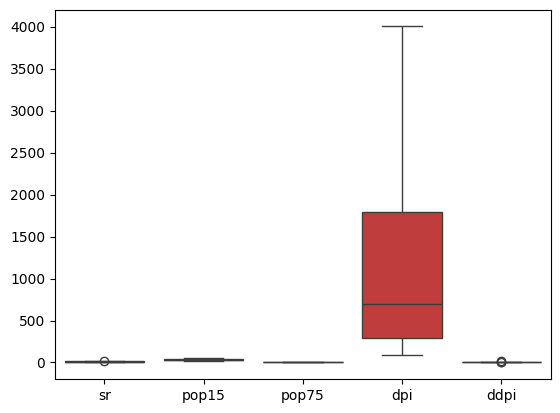

In [4]:
# Outliers

sns.boxplot(data)

<h3>Treating the discovered Outliers</h3>

In [5]:
cols = ['sr','ddpi']

In [6]:
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

upperBound = Q3 + 1.5 * IQR
lowerBound = Q1 - 1.5 * IQR

Q1,Q3,IQR,upperBound,lowerBound


(sr      6.9700
 ddpi    2.0025
 Name: 0.25, dtype: float64,
 sr      12.6175
 ddpi     4.4775
 Name: 0.75, dtype: float64,
 sr      5.6475
 ddpi    2.4750
 dtype: float64,
 sr      21.08875
 ddpi     8.19000
 dtype: float64,
 sr     -1.50125
 ddpi   -1.71000
 dtype: float64)

In [7]:
new_data = data.copy() 

new_data[cols] = np.where(new_data[cols] > upperBound,upperBound,np.where(new_data[cols] < lowerBound,lowerBound,new_data[cols]))

<Axes: >

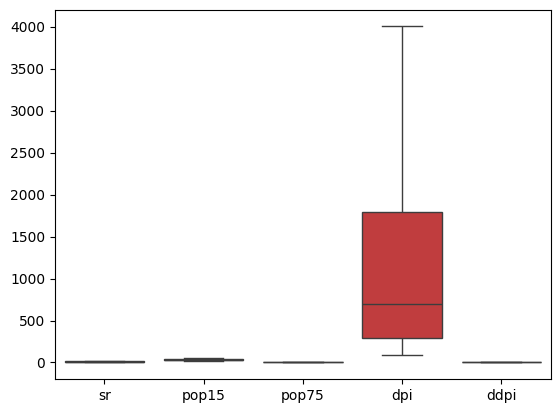

In [8]:
sns.boxplot(new_data)

After discovering that my dataset had Outlier, I used the IQR method to detect and single them out then proceeded to use the capping method to treat the  Outliers in order to maintain all my entries since capping replaces the Outliers with the upperBound and lowerBound

<h2>Calculating the Descriptive Statistics</h2>

In [9]:
new_data.describe()

,sr,pop15,pop75,dpi,ddpi
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.670775,35.089600,2.293000,1106.758400,3.546000
std,4.479821,9.151727,1.290771,990.868889,2.170258
min,0.600000,21.440000,0.560000,88.940000,0.220000
25%,6.970000,26.215000,1.125000,288.207500,2.002500
50%,10.510000,32.575000,2.175000,695.665000,3.000000
75%,12.617500,44.065000,3.325000,1795.622500,4.477500
max,21.088750,47.640000,4.700000,4001.890000,8.190000


From the descriptive statistics: 'sr','pop15','pop75' and 'ddpi' appear to be relatively symmetric because the mean and median are close 

From the descriptive statistics: The standard deviation for 'dpi' is significantly larger than others suggesting a higher degree of variability in the data

From the descriptive statistics: The range for 'dpi' is also much larger than for other values indicating a wider spread of values



# Graph for distribution of pop15

<Axes: xlabel='pop15', ylabel='Count'>

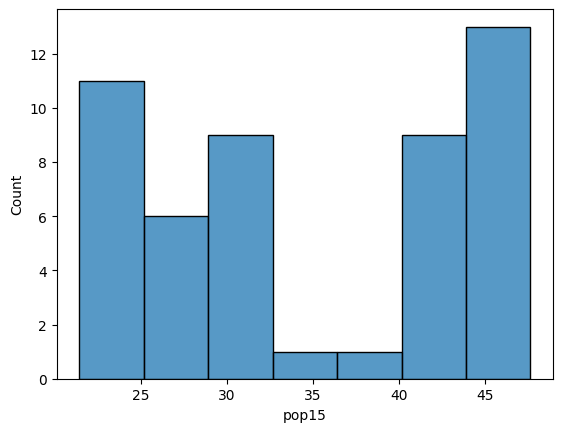

In [10]:
sns.histplot(new_data['pop15'])

The graph above displays a bimodal distribution. This means that there are two distinct peaks in the data suggesting that there are to two common values centered around 25 and 45

<h3>relationship between the population over 75 (“pop75”) and the growth rate of dpi (“ddpi”)<h3/>

In [11]:
data[['pop75','ddpi']].corr()

,pop75,ddpi
pop75,1.000000,0.025321
ddpi,0.025321,1.000000


<Axes: xlabel='pop75', ylabel='ddpi'>

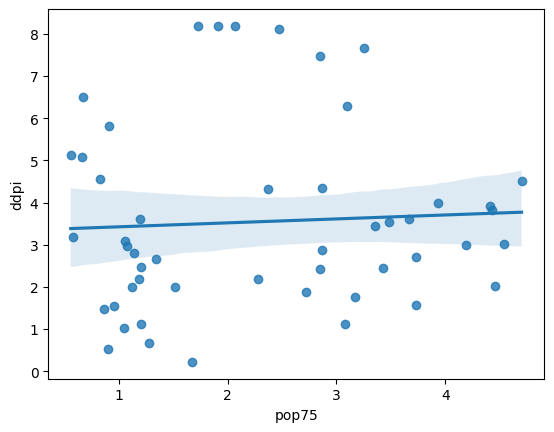

In [12]:
sns.regplot(x='pop75',y='ddpi',data=new_data)

pop17 and ddpi have a very low positive correlation therefore as population over 75 increases there is a very low increase in the ddpi. We can conclude that the growth rate of the disposable income for the population over 75 is low

<h3>relationship between aggregate personal saving (“sr”) and real rear disposal income (“dpi)”</h3>

<Axes: xlabel='sr', ylabel='dpi'>

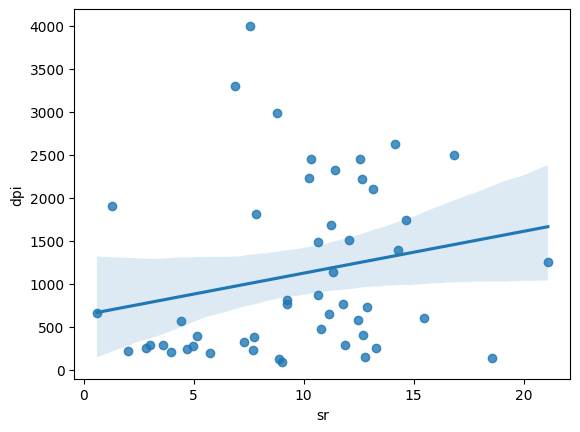

In [13]:
sns.regplot(x='sr',y='dpi',data=data)

From the visualization we can observe that as the sr increases the dpi increases as well. We can conclude that as the aggregate personal income of an individual increases their real rear disposable income increases as well